In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# read csv file
games = pd.read_csv("appstore_games.csv")

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [49]:
# numeric overview of the dataset
games.describe()

,ID,Average_user_rating,User_rating_count,Price,App_size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [50]:
#checking data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   app_name                      17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon_URL                      17007 non-null  object 
 5   Average_user_rating           7561 non-null   float64
 6   User_rating_count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In_app_purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age_Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  A

In [25]:
#checking columns
games.columns

Index(['URL', 'ID', 'app_name', 'Subtitle', 'Icon_URL', 'Average_user_rating',
       'User_rating_count', 'Price', 'In_app_purchases', 'Description',
       'Developer', 'Age_Rating', 'Languages', 'App_size', 'Primary_genre',
       'Genres', 'Original_release_date', 'Current_version_release_date'],
      dtype='object')

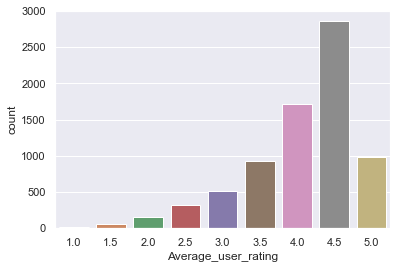

In [56]:
# countplot to visualize "user rating vs count"

sns.set_theme(style="darkgrid")
plot1= sns.countplot(x=games['Average_user_rating'])

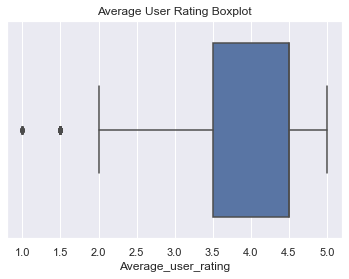

In [75]:
# price distribution boxplot
#games.boxplot(column = 'Price')

plot2 = sns.boxplot(x='Average_user_rating',data=games).set(title='Average User Rating Boxplot')

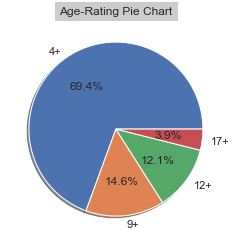

In [93]:
#Creating a pie-chart of Age_Rating

set1 = pd.DataFrame(games['Age_Rating'].value_counts()/games['Age_Rating'].count())
set1.reset_index(inplace = True)
plt.pie(x=list(set1['Age_Rating']), labels = list(set1['index']),autopct='%.1f%%', shadow=True)
plot3 = plt.title("Age-Rating Pie Chart", bbox = {'facecolor':'0.8','pad':5})

/Users/chanlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


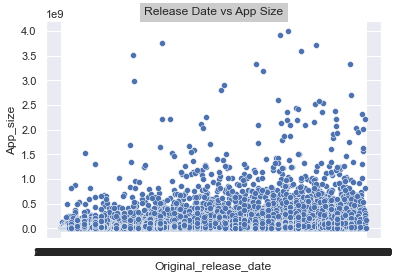

In [141]:
#Check relation between "app released date" and "app size"
#Convert data type of values in "Original_release_date" column from string to datetime type

data['Original_release_date'] = pd.to_datetime(data['Original_release_date'], format = '%d/%m/%Y')
date_size = pd.DataFrame({'App_size':data['App_size']})
date_size = date_size.set_index(data['Original_release_date'])
date_size = date_size.sort_values(by=['Original_release_date'])
date_size['App_size'] = date_size['App_size'].apply(lambda b: b//(2**10))

monthly_size = date_size.resample('M').mean()
tmp = date_size.resample('M')
monthly_size['min'] = tmp.min()
monthly_size['max'] = tmp.max()

#release_date = games['Original_release_date']
#app_size = games['App_size']
#plt.plot_date(release_date, app_size)
#plt.show()

release_date = games['Original_release_date']
app_size = games['App_size']
sns.scatterplot('Original_release_date', 'App_size', data=games)
plot4 = plt.title("Release Date vs App Size", bbox = {'facecolor':'0.8','pad':5})